# Problem Description

Design a program that uses "Benford's Law" to investigate whether there may have been fraudulent voting data released in the 2009 Iranian Presidential Election. [Benford's Law](https://en.wikipedia.org/wiki/Benford%27s_law) describes the expected distribution of "leading digits" of numbers in commonly occurring numerical data.

The leading digit of a number is the leftmost digit in that number. For example, the leading digit of 12,982 is 1, while the leading digit of 370 is 3. Note that for positive integers, the leading digit can never be 0.

Benford's Law predicts that leading 1's are more common than leading 2's, leading 2's more common than leading 3's, 3's more common than 4's, and so forth. The particular predicted frequency is described below.

In particular, you should produce a histogram of the number of leading digits that are 1's, 2's, 3's, 4's, 5's, 6's, 7's, 8's, and 9's in votes for Karrubi in the file `2009-iranian-presidential-election-votes.csv` and then compare that to the [plot of the expected frequencies in the Benford's Law article](https://en.wikipedia.org/wiki/Benford%27s_law#/media/File:Rozklad_benforda.svg).

The information comes from http://www.irantracker.org/analysis/2009-iranian-presidential-election-results-city.

*Note: We have completed all except the visualization piece of the problem for you! Use a histogram for the visualization piece.*

## Planning

### Step 1a: Identify the information in the file your program will read

This file contains information on the number of votes cast in each of a large set of cities in Iran in the 2009 presidential election for candidates Ahmadinejad, Rezai, Karrubi, and Mousavi, the total number of votes cast, the number of votes voided (presumably for over-voting, under-voting, or the like), and the number of legitimate (non-voided) votes.

Each row represents one city and, along with the counts above, has the city's name and the province containing the city.

### Step 1b: Write a description of what your program will produce

This information might allow us to compute who wins the elections, the vote totals per candidate, produce a list of the cities with the most support for each candidate, color provinces on a map according to how much support each candidate received, or many other analyses.

However, we've been asked to perform a very specific analysis, charting the frequency of leading digits in the information. Because it will make it easier to find the leading digit, we'll actually convert the data to strings at one point. (The "leading digit" of a string `s` is just `s[0]`!)

### Step 1c: Write or draw examples of what your program will produce

We'll use the small file to show what we might produce. Here's the information in that file:

```CSV
Province,City,Ahmadinejad,Rezai,Karrubi,Mousavi,Total Votes Cast,Voided Votes,Legitimate Votes
East Azerbaijan,Azar Shahr,37203,453,138,18312,56712,606,56106
West Azerbaijan,Aromia,234600,3727,3544,199682,445344,3791,441553
Ardabil,Ardabil,137220,4411,1115,140582,285700,2372,283328
Kermanshah,West Islamabad,50878,897,669,32525,85833,864,84969
Yazd,Abir Koh,21659,187,51,6376,28473,200,28273
```

The leading digits for Karrubi are: `[1, 3, 1, 6, 5]`. So, we might make a histogram like this:

      |
    3 |   
      |   
    2 |  *
      |  *
    1 |  *     *     *  *
      |  *     *     *  *
      +-----------------------------
         1  2  3  4  5  6  7  8  9

## Building the Program

### Step 2a: Design data definitions

We only need Karrubi's vote totals from the information available. That makes our `Consumed` type particularly simple, just an `int`. We'll assume the integer is positive.

In [1]:
from cs103 import *
from typing import NamedTuple, List
import csv

##################
# Data Definitions



# List[int]
# interp. a list of vote counts for Karrubi
# Note: we assume each integer is positive (no negative numbers or, critically, 0's).
L0 = []
L1 = [138, 3544, 1115, 669, 51]  # Karrubi's totals in our small file

# Template based on arbitrary-sized
@typecheck
def fn_for_loi(loi: List[int]) -> ...:
    # description of the acc
    acc = ...      # type: ...
    for i in loi:
        acc = ...(i, acc)
    
    return ...(acc)

# This will also come in handy:

# List[str]
# interp. a list of strings
LOS0 = []
LOS1 = ["18312", "199682", "140582", "32525", "6376"]

# Template based on arbitrary-sized
@typecheck
def fn_for_los(los: List[str]) -> ...:
    # description of the acc
    acc = ...      # type: ...
    for s in los:
        acc = ...(s, acc)
    
    return ...(acc)


### Step 2b: Design a function to read the information and store it as data in your program

In [2]:
@typecheck
def read(filename: str) -> List[int]:
    """    
    reads information from the specified file and returns a list of Karrubi's vote totals
    """
    #return []  #stub
    # Template from HtDAP
    
    # loi contains the result so far
    loi = [] # type: List[int]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        
        # skip header line
        next(reader) 

        for row in reader:
            # Karrubi's totals are in the 5th column, i.e., the one numbered 4.
            i = parse_int(row[4])
            loi.append(i)
    
    return loi

start_testing()

expect(read('2009-iranian-presidential-election-votes-small.csv'), L1)
expect(read('2009-iranian-presidential-election-votes-tiny.csv'), [345])

# We'll make sure we can read this (at all) without checking what the specific results are.
expect(len(read('2009-iranian-presidential-election-votes.csv')), 366)

summary()

3 of 3 tests passed


### Step 2c: Design functions to analyze the data

Our main analysis function will plot Karrubi's histogram; so `plot_karrubi_histogram`.

However, to get to that point, we'll need to get the leading digits of votes for Karrubi. So, we'll break this into a function composition. First `get_leading_digits` and then `plot_histogram`.

Here are the functions to pull the leading digits:

In [3]:
@typecheck
def get_leading_digit(i: int) -> int:
    """
    produce a the leading digit of i
    
    Note: assumes i is positive; so, the result must be between 1 and 9.
    """
    #return i  #stub
    #template based on atomic non-distinct
    
    # This is a nifty trick, but not one we'd expect you to 
    # think of on your own!
    return int(str(i)[0])

@typecheck
def get_leading_digits(loi: List[int]) -> List[int]:
    """
    produce a list of only the leading digits of each number
    
    Note: assumes the elements of loi are positive; so, the results will all be 1 through 9.
    """
    #return loi  #stub
    #template from List[int]
    
    # The leading digits of the numbers seen so far:
    digits_so_far = []      # type: List[int]
    
    for i in loi:
        digits_so_far.append(get_leading_digit(i))
    
    return digits_so_far


# Begin testing
start_testing()

expect(get_leading_digits([]), [])
expect(get_leading_digits(L1), [1, 3, 1, 6, 5])

expect(get_leading_digit(132), 1)
expect(get_leading_digit(2145), 2)
expect(get_leading_digit(3095409), 3)
expect(get_leading_digit(4096), 4)
expect(get_leading_digit(5), 5)
expect(get_leading_digit(60923408), 6)
expect(get_leading_digit(70), 7)
expect(get_leading_digit(8210), 8)
expect(get_leading_digit(9), 9)

# show testing summary
summary()

11 of 11 tests passed


# DONE: COMPLETE THIS FUNCTION!

Here is where you should complete the `plot_histogram` function that takes in an array of leading digits and plots it as a histogram.

For the `main` and `plot_karrubi_histogram` functions below, and one more test each (which may be a very small one!).

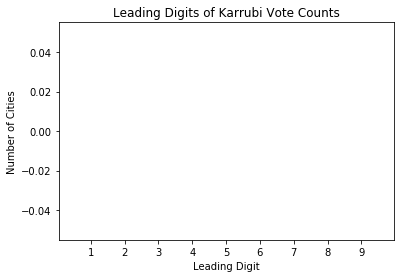

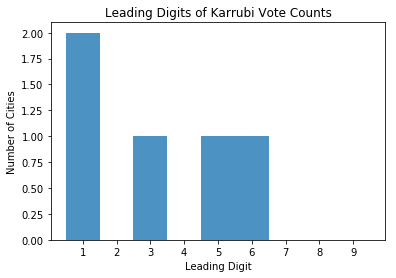

2 of 2 tests passed


In [4]:
import matplotlib.pyplot as pyplot

@typecheck
def plot_histogram(leading_digits: List[int]) -> None:
    """
    Plots a histogram of the given list of integers.
    The numbers must be in the range 1 through 9.
    
    Creates a plot and returns None.
    """
    #return None  #stub
    # Template from visualization
    pyplot.title('Leading Digits of Karrubi Vote Counts')
    pyplot.xlabel('Leading Digit')
    pyplot.ylabel('Number of Cities')
    pyplot.hist(leading_digits, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], alpha = 0.8)
    pyplot.xticks([1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5], [1, 2, 3, 4, 5, 6, 7, 8, 9])    
    pyplot.show()

start_testing()

# This should produce an empty graph with: x-axis "Leading Digit",
# y-axis "Number of Cities", title "Leading Digits of Karrubi Vote Counts",
# and ticks neatly spaced and labeled 1, 2, ..., 9 across the x axis.
expect(plot_histogram([]), None)
    

# For testing, we run it and compare the resulting histogram against this sketch:

#      |
#    3 |   
#      |   
#    2 |  *
#      |  *
#    1 |  *     *     *  *
#      |  *     *     *  *
#      +-----------------------------
#         1  2  3  4  5  6  7  8  9

expect(plot_histogram([1, 3, 1, 6, 5]), None)

summary()

Here are the analysis and main. Note that because we produce a visualization, `expect` is of limited use for testing. Instead, we write the expects and then visually inspect the results against our sketches or descriptions.

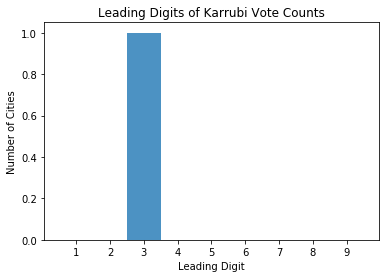

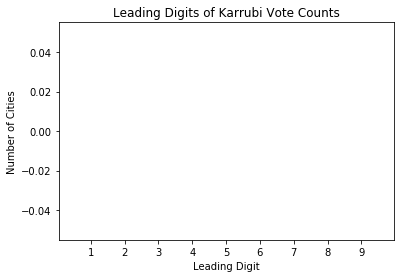

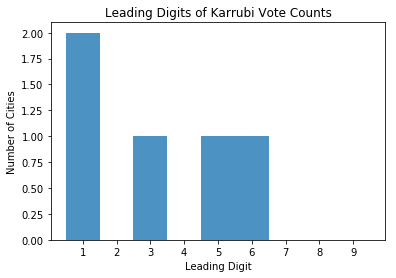

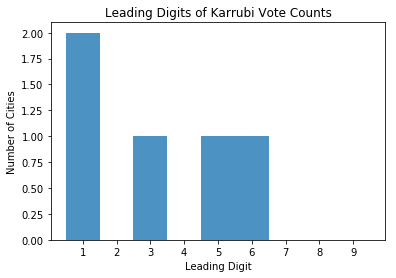

4 of 4 tests passed


In [5]:
# Because our goal is to create a plot, we return nothing (None).
@typecheck
def main(filename: str) -> None:
    """
    Reads the file from given filename, analyzes the data,
    and plots a histogram of Karrubi's leading digits in the votes.
    
    Does not return anything!
    """
    # template based on function composition (from HtDAP)
    plot_karrubi_histogram(read(filename))

@typecheck
def plot_karrubi_histogram(karrubi_votes: List[int]) -> None:
    """
    Plots a histogram of the leading digits of the votes for Karrubi.
    
    Does not return anything!
    """
    #return None  #stub
    # template based on function composition
    plot_histogram(get_leading_digits(karrubi_votes))


start_testing()

# This should produce an ALMOST empty graph with: x-axis "Leading Digit",
# y-axis "Number of Cities", title "Leading Digits of Karrubi Vote Counts",
# and ticks neatly spaced and labeled 1, 2, ..., 9 across the x axis.
#
# It will have a bar on 3 going up to 1 and no other bars.
expect(main('2009-iranian-presidential-election-votes-tiny.csv'), None)

# This should produce an empty graph with: x-axis "Leading Digit",
# y-axis "Number of Cities", title "Leading Digits of Karrubi Vote Counts",
# and ticks neatly spaced and labeled 1, 2, ..., 9 across the x axis.
expect(plot_karrubi_histogram([]), None)


# Testing plot_karrubi_histogram and main against this sketch:

#      |
#    3 |   
#      |   
#    2 |  *
#      |  *
#    1 |  *     *     *  *
#      |  *     *     *  *
#      +-----------------------------
#         1  2  3  4  5  6  7  8  9

expect(main('2009-iranian-presidential-election-votes-small.csv'), None)
expect(plot_karrubi_histogram(L1), None)
summary()

## The Actual Plot

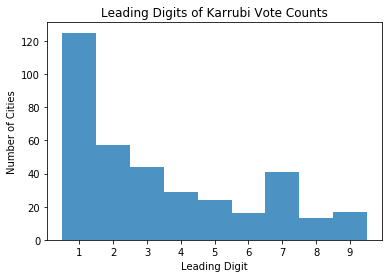

In [6]:
main('2009-iranian-presidential-election-votes.csv')

# One of the pieces of evidence of fraud was the large deviation
# from the expected result in the 7's place. (It's harder to see,
# but the 2's place was also problematic.)